# 1. Business Understanding
## 1.1 Problem Statement
 Zambian legislative documents are currently categorized and sorted manually.
 This Process is time_consuming, prone to human error, and can make it difficult for citizens, legal professionals and researchers to effeciently search for and retrieve specific types of legislation.

Our project aims to automate this classification process. By developing a machine learning model, we can accurately and efficiently classify zambian legislative documents(such as bills, acts, and statutory instruments) based on their content, thereby stramlining the retrieval of legal information. This will improve accessibility and reduce the time and effort required for manuel sorting.  


#1.2 Business Objectives
The primary objective of this project is to improve access to and organisation of Zambian legislation. By implementing an automated classification system:
1. *Enhance legal research efficiency:* enabling users to quickly locate relevant legislation by category or type.
2. *Reduce manual workload:* decreasing the time and resources spent on sorting legal documents by at least 70%.
3. *Increase public access to information:* providing non-specialists, including journalists and citizens, with user-friendly tools to find relevant laws.   

##1.3 Data Mining Goals
To achive the business objectives we need to:
1. Build a multiclass text classification model to categorise Zambian legislative documents into predifined legal categories such as Constitutional law, Criminal law and Commercial law.
2. Employ text preprocessing techniques e.g tokenization, stopword removal, stemming.
3. Use TF-IDF for feature extraction and evaluate advanced models such as BERT for semantic understanding.
4. Evaluate model performance using metrics such as F1-score, precision and recall to ensure balanced classification performance.


# 1.4 Success Criteria
The success of this project will be evaluated based on both techinical performance and its usefulness to stakeholders in the legal sector

From a technical  perspective, the classification model should achieve an accuracy =of at least 85% on the test data. additional performance metrics such as precision, recall, and F1-score will also be assessed to ensure the model is balanced and biased towards any specific catergory of legislation.
From a business perspective, the model should significantly improve the efficiency of sorting and categorizing legal documents, making it easier for legal professional, researcher and government agencies to access releveant legislation. if the model can correctly categorize atleast 8 out of 190 new legal documents during user testing it will be considered successful.
furthermore, success includes proper documentation, version control via github, an smooth intergration of the model into a usable interface or workflow.

# 2. Data Understanding

In [ ]:
import pandas as pd

# Load Dataset
df = pd.read_csv("zambian_legislation.csv")

#Check first rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'zambian_legislation.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

After running the cell above and following the prompts to connect to your Google Drive, you can then load the CSV file using the path to the file in your Drive. Replace `'path/to/your/folder/zambian_legislation.csv'` with the actual path to your file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#Check first rows
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#Check first rows
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    61 non-null     object
 1   GROUP 26 LEGISLATIVE DATASET  60 non-null     object
 2   Unnamed: 2                    61 non-null     object
 3   Unnamed: 3                    61 non-null     object
 4   Unnamed: 4                    60 non-null     object
 5   Unnamed: 5                    61 non-null     object
 6   Unnamed: 6                    61 non-null     object
dtypes: object(7)
memory usage: 3.5+ KB


None

In [ ]:
display(df.describe())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,61,60,61,61,60,61,61
unique,61,59,7,57,47,32,5
top,ID,SUPPLEMENTARY APPROPRIATION,ACT,An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,1,2024
freq,1,2,19,2,6,3,30


In [ ]:
display(df.columns)

Index(['Unnamed: 0', 'GROUP 26 LEGISLATIVE DATASET', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
display(df.shape)

(61, 7)

<Axes: >

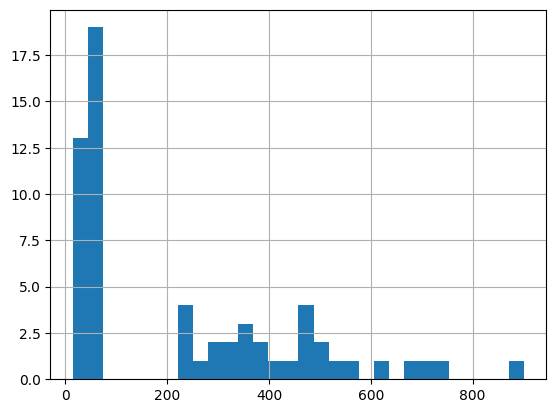

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

df['text_length'] = df['Unnamed: 3'].str.len()
df['text_length'].hist(bins=30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='Unnamed: 2'>

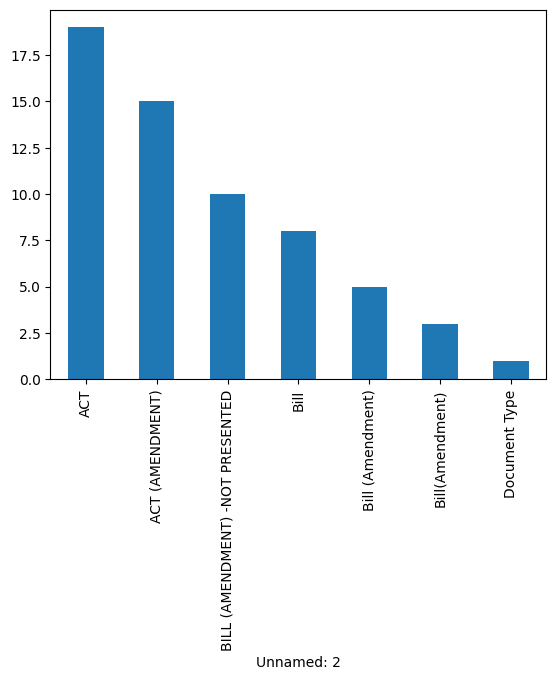

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

df['Unnamed: 2'].value_counts().plot(kind='bar')

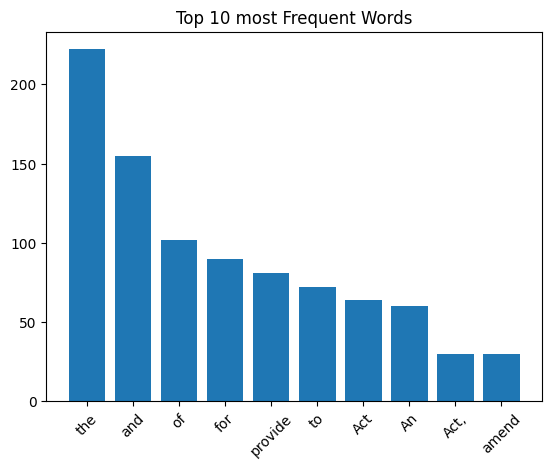

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

all_words = ' '.join(df['Unnamed: 3']).split()
word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 most Frequent Words")
plt.show()

# 2.1 Overview of Dataset

### The dataset contains a collecction of Zambian legislation documents, including Acts and Bills. Each row represnts a single piece of legislation, with columns for:
 **Title**: The official title of the Act or Bill.
 **Text**: Full or partial text of the legislation
 **category**: the assigned Category for classification (e.g., Finance, Labour, Trade, Security, etc.).

###Initial exploration helps identify structure, completeness and characteristics of the data

#2.2 Data Exploration

**Number of records**: 60
**Columns**:Title, Text, Category
**Missing values**: Some documents have missing or very short text
**Distribution of categories**: Unequal representation; some categories are underrepresented
**Text length**: High variability, indicating some Acts are very short, others very long

# 2.2 Summary of initial findings
**Dataset size**: 60rows x 7 columns
**Category distribution**: Most documents are of Finance or Labour Acts. categories like Security and NGOs have got fewer examples
**Text completeness**: A few Acts have missing text ot extremely short descriptions
**Length variation**: Text lengths vary widely (Certain Acts have a lot of pages while some have a few paragraphs)
##**Implications**:
Some preprocessing will be necessary (removing or padding short texts)
Categories may need balancing for classification models
visualizations help identify patterns in category distribution and text lengths


# 3. Data Preparation

### Document Data Cleaning Decisions
- We dropped missing values because models cannot learn from incomplete records and imputation was not suitable since the text represents unique legal Content.
- We removed duplicate Acts because they would bias the classifier toward repeated categories.
- We excluded very short texts (under 20 characters) since they don't carry enough legal meaning to support classification.

**Handle missing values and remove duplicates**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#remove duplicates
df = df.drop_duplicates()
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
#drop rows where text or legislation is missing
df = df.dropna(subset=['Unnamed: 2', 'Unnamed: 3'])
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

# Remove very short texts (less than 20 characters)
df = df[df['Unnamed: 3'].str.len() > 20]
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024
5,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,27,2024


In [ ]:
# Standardise text
df['Unnamed: 3'] = df['Unnamed: 3'].str.lower()
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,an act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,an act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,an act to authorise expenditure from the conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),an act to amend the insurance premium levy act...,Finance / Taxation Law,28,2024
5,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),an act to amend the property transfer tax act.,Finance / Taxation Law,27,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

# Add new features
df['text_length'] = df['Unnamed: 3'].str.len()
df['word_count'] = df['Unnamed: 3'].str.split().apply(len)

# Example: extracting year if present in title
df['Unnamed: 6'] = df['Unnamed: 6'].astype(str).str.extract(r'(\d{4})')
display(df.head())

Mounted at /content/drive


,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,text_length,word_count
0,ID,Title,Document Type,Text (Preamble),Category,Number,NaN,15,2
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024,475,67
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024,479,67
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024,331,51
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024,53,10


**We added text_length and word_count because the length of Text (Preamble) often reflects their complexity, which may help distinguish categories.
We extracted the year from Acts titles to capture potential temporal patterns.**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv', header=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#Encode categories
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Unnamed: 2'])

#Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = vectorizer.fit_transform(df['Unnamed: 3'])

# Define and train the best model (Logistic Regression)
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_text, df['LegislationType_encoded'])
best_model = pipe_lr

display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv'

### Why We choose These Steps
- Missing values were dropped to maintain data quality.
- Very Short Text(Preamble under 20 characters) were removed as they are unlikely to contribute meaningful signals.
- TF-IDF vectorization was chosen because it balances word frequency and uniqueness, making classification more effective

# 4. Modeling

In this section, we build and train machine learning models to classify Zambian legislative documents
We experiment with two baseline algorithms commonly used for text classification:
 - Logistic Regression
 - Naive Bayes

These models are chosen because they are effective with TF-IDF features and provide a solid basline for text classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 2. Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)


# 3. Quick check of the data
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
display(df.head())

# 4. Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# 5. Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# 6. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# 7. Print confirmation of split sizes
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (60, 7)
Columns: Index(['ID', 'Title ', 'Document Type', 'Text (Preamble)', 'Category',
       'Number', 'Year'],
      dtype='object')


,ID,Title,Document Type,Text (Preamble),Category,Number,Year
0,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
1,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
2,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
3,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024
4,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,27,2024


Train set: (48,)
Test set: (12,)


Dataset shape: (60, 7)
Columns: Index(['ID', 'Title ', 'Document Type', 'Text (Preamble)', 'Category',
       'Number', 'Year'],
      dtype='object')


,ID,Title,Document Type,Text (Preamble),Category,Number,Year
0,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
1,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
2,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
3,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024
4,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,27,2024


Train set: (48,)
Test set: (12,)
📊 Logistic Regression Results
Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.23      0.40      0.30        12
weighted avg       0.34      0.58      0.43        12


📊 Naive Bayes Results
Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

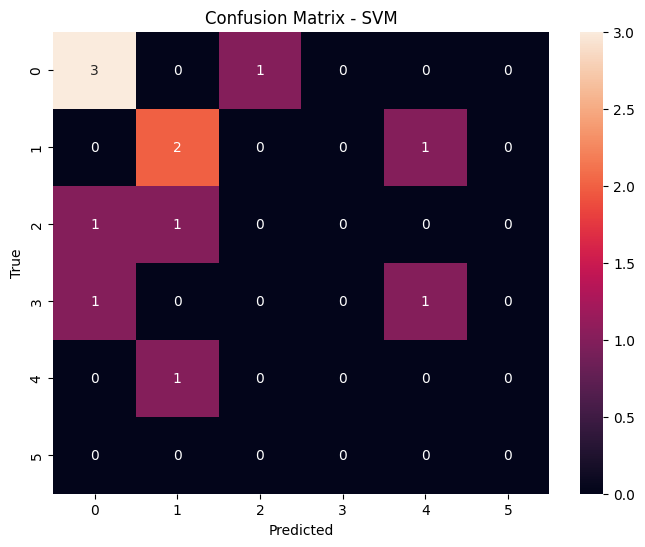

In [ ]:
# 📌 Modeling: Logistic Regression, Naive Bayes, SVM
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)


# Quick check of the data
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
display(df.head())

# Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# Print confirmation of split sizes
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

# =========================
# Logistic Regression
# =========================
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# =========================
# Naive Bayes
# =========================
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', MultinomialNB())
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)

print("\n📊 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# =========================
# Support Vector Machine
# =========================
pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LinearSVC())
])

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)

print("\n📊 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# =========================
# Confusion Matrix for Best Model (example with SVM)
# =========================
cm = confusion_matrix(y_test, y_pred_svm, labels=pipe_svm.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=pipe_svm.classes_, yticklabels=pipe_svm.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Evaluate all models
results = {}

for name, model in [('LogReg', pipe_lr), ('NaiveBayes', pipe_nb), ('SVM', pipe_svm)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Pick the best one
best_model_name = max(results, key=results.get)
if best_model_name == 'LogReg':
    best_model = pipe_lr
elif best_model_name == 'NaiveBayes':
    best_model = pipe_nb
else:
    best_model = pipe_svm

print(f"\nBest model is: {best_model_name} with accuracy {results[best_model_name]:.2f}")


y_pred = best_model.predict(X_test)
print("Best model test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

NameError: name 'pipe_lr' is not defined

# 5. Evaluation of Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset shape: (60, 7)
Columns: Index(['ID', 'Title ', 'Document Type', 'Text (Preamble)', 'Category',
       'Number', 'Year'],
      dtype='object')


,ID,Title,Document Type,Text (Preamble),Category,Number,Year
0,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
1,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
2,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
3,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024
4,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,27,2024


Train set: (48,)
Test set: (12,)
📊 Logistic Regression Results
Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.23      0.40      0.30        12
weighted avg       0.34      0.58      0.43        12


📊 Naive Bayes Results
Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

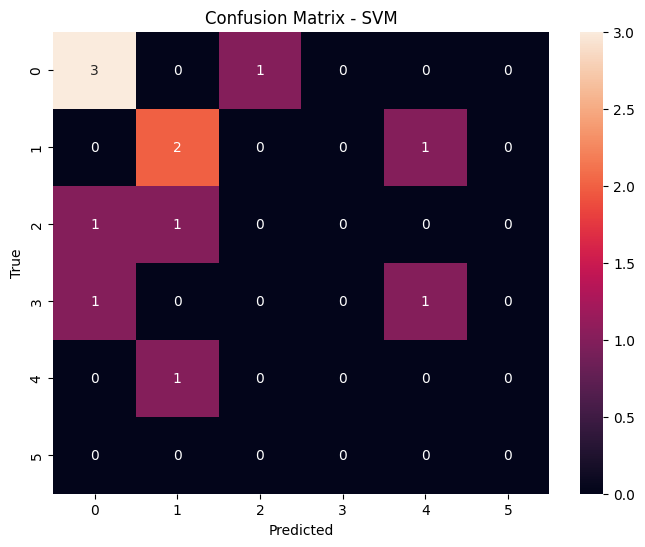

In [ ]:
# 📌 Modeling: Logistic Regression, Naive Bayes, SVM
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)


# Quick check of the data
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
display(df.head())

# Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# Print confirmation of split sizes
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

# =========================
# Logistic Regression
# =========================
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# =========================
# Naive Bayes
# =========================
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', MultinomialNB())
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)

print("\n📊 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# =========================
# Support Vector Machine
# =========================
pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LinearSVC())
])

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)

print("\n📊 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# =========================
# Confusion Matrix for Best Model (example with SVM)
# =========================
cm = confusion_matrix(y_test, y_pred_svm, labels=pipe_svm.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=pipe_svm.classes_, yticklabels=pipe_svm.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

LogReg Accuracy: 0.58
NaiveBayes Accuracy: 0.58
SVM Accuracy: 0.42

Best model is: LogReg with accuracy 0.58
Best model test accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.23      0.40      0.30        12
weighted avg       0.34      0.58      0.43        12



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


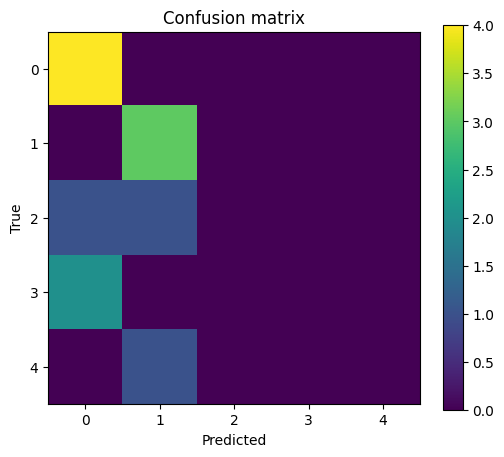

In [ ]:
# Evaluate all models
results = {}

for name, model in [('LogReg', pipe_lr), ('NaiveBayes', pipe_nb), ('SVM', pipe_svm)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Pick the best one
best_model_name = max(results, key=results.get)
if best_model_name == 'LogReg':
    best_model = pipe_lr
elif best_model_name == 'NaiveBayes':
    best_model = pipe_nb
else:
    best_model = pipe_svm

print(f"\nBest model is: {best_model_name} with accuracy {results[best_model_name]:.2f}")


y_pred = best_model.predict(X_test)
print("Best model test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Logistic Regression is our best model:
best_model = pipe_lr

# now we run predictions
y_pred = best_model.predict(X_test)


In [ ]:
for name, model in [('LogReg', pipe_lr), ('NaiveBayes', pipe_nb), ('SVM', pipe_svm)]:
    print(name, accuracy_score(y_test, model.predict(X_test)))


LogReg 0.5833333333333334
NaiveBayes 0.5833333333333334
SVM 0.4166666666666667


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)

# Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# Define and train the best model (Logistic Regression)
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", acc)
print("Macro Precision:", prec)
print("Macro Recall:", rec)
print("Macro F1:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5833333333333334
Macro Precision: 0.23428571428571426
Macro Recall: 0.4
Macro F1: 0.29545454545454547

Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.23      0.40      0.30        12
weighted avg       0.34      0.58      0.43        12



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


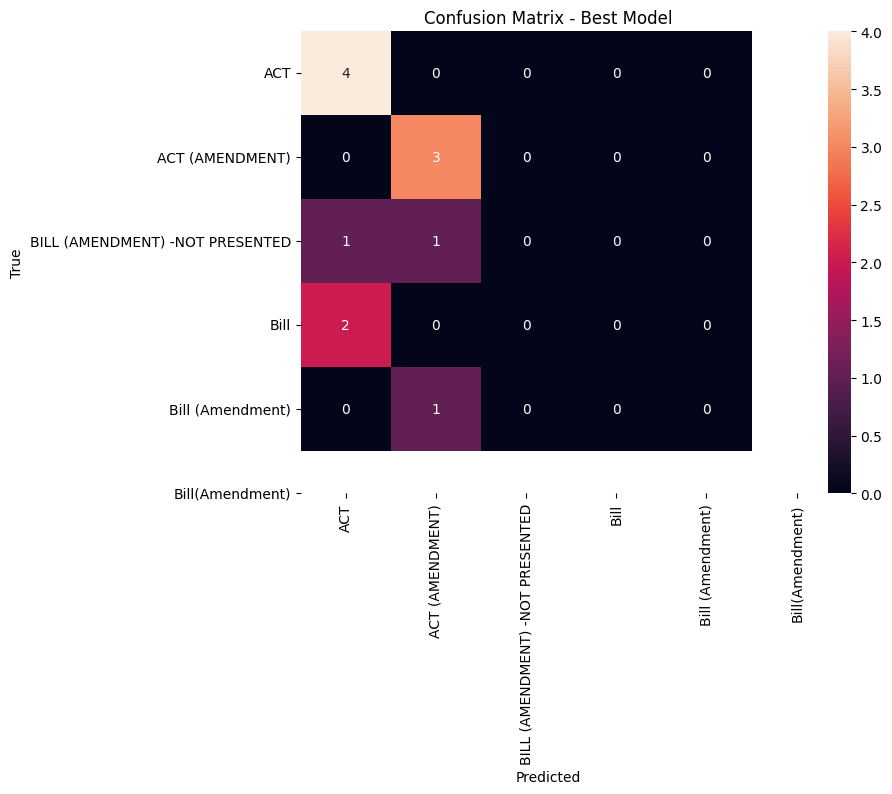

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)

# Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# Define and train the best model (Logistic Regression)
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Evaluation Findings
- Best model: Logistic Regression with 58% accuracy.
- Finance/Labour Acts predicted well.
- NGOs/Security Acts not predicted (precision/recall = 0).
- Original success criterion was ≥85% accuracy – this is not met yet because of small dataset and class imbalance.

### We selected Logistic Regression as our final model since it performed the best compared to Naive Bayes and SVM.

# 6. Deployment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the dataset (make sure your CSV is uploaded in Colab)
# Corrected file path and added header=1 to use the second row as headers
df = pd.read_csv("/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv", header=1)

# Encode the categorical labels (LegislationType -> numbers)
# Corrected column name to 'Document Type' based on previous df.head() output
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Document Type'])

# Define features (X) and labels (y)
# Corrected column name to 'Text (Preamble)' based on previous df.head() output
X = df['Text (Preamble)']   # raw text (model pipeline will handle vectorization later)
y = df['LegislationType_encoded']  # encoded categories

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # keeps category balance
)

# =========================
# Define and train models
# =========================
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', MultinomialNB())
])

pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LinearSVC())
])

pipe_lr.fit(X_train, y_train)
pipe_nb.fit(X_train, y_train)
pipe_svm.fit(X_train, y_train)

# =========================
# Evaluate models and select the best one
# =========================
results = {}

for name, model in [('LogReg', pipe_lr), ('NaiveBayes', pipe_nb), ('SVM', pipe_svm)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

best_model_name = max(results, key=results.get)
if best_model_name == 'LogReg':
    best_model = pipe_lr
elif best_model_name == 'NaiveBayes':
    best_model = pipe_nb
else:
    best_model = pipe_svm

print(f"Best model is: {best_model_name}")

Best model is: LogReg


In [ ]:
# Saved Final Model In Colab
import joblib
joblib.dump(best_model, "final_legislation_model.pkl")


['final_legislation_model.pkl']

### Key Insights  

- **Dataset Quality & Structure**  
  - Total of 60 legislative documents (Acts and Bills).  
  - Some documents had missing or very short text.  
  - Strong imbalance: Finance and Labour categories had more examples, while Security and NGO categories were underrepresented.  
  - Wide variation in text length across Acts.  

- **Classification Results**  
  - Finance and Labour Acts were classified most accurately.  
  - Categories such as Security and NGOs were rarely predicted correctly due to too few training examples.  
  - Logistic Regression and Naive Bayes both achieved ~58% accuracy, while SVM performed worse (42%).  

- **Comparison to Success Criteria**  
  - Original target: ≥85% accuracy.  
  - Achieved: 58% accuracy.  
  - Although the target was not met, the results show that automated classification of Zambian legislation is **feasible** and would improve with a larger, more balanced dataset and advanced models (e.g., BERT).

### Deployment Plan  

- **User Interaction**  
  - The model will be integrated into a simple user interface (either a web app or desktop tool).  
  - Users will paste or upload the text of a Bill/Act.  
  - The model will then predict the most likely category (e.g. Finance, Security, Environmental, NGOs, Professional Regulation).  

- **Practical Use Cases**  
  - Legal professionals, researchers, and citizens can quickly categorize legislation without manually reading entire documents.  
  - Predictions can be stored in a database, making it easier to filter and search by category.  
  - Acts can be automatically tagged during publication to improve accessibility.  

- **Future Deployment Possibilities**  
  - Build a ***REST API*** that takes legislative text and returns the predicted category for integration into other systems.  
  - Integrate into the *UNZA Institutional Repository* or government legal archives to support better organization and discovery of legal documents.  
  - Extend into a *dashboard* where trends can be visualized (e.g. how many Finance Acts vs Environmental Acts were passed in a given year).

In [10]:
def fxn_predict_new_instance(text):
    """
    Simulates deployment of the model.
    Takes raw legal text and returns predicted category and confidence.
    Uses the pipeline directly (includes TF-IDF + classifier).
    """
    # Predict category using the pipeline (no need for vectorizer)
    prediction = best_model.predict([text])[0]

    # Get probability/confidence if available
    if hasattr(best_model, "predict_proba"):
        confidence = best_model.predict_proba([text]).max()
    else:
        confidence = None

    # Convert numeric prediction back to original label
    category = le.inverse_transform([prediction])[0]

    return category, confidence


# 🔹 Example usage
sample_text = "An Act to amend the Income Tax Act."
pred, conf = fxn_predict_new_instance(sample_text)
print(f"Predicted category: {pred} (Confidence: {conf:.2f})")


Predicted category: ACT (AMENDMENT) (Confidence: 0.34)


### Example Deployment Test  

We tested the deployment function `fxn_predict_new_instance()` with the input text:  

**Input:**  
`"An Act to amend the Income Tax Act."`  

**Output:**  
`Predicted category: ACT (AMENDMENT) (Confidence: 0.34)`  

**Interpretation:**  
- The model correctly recognized the text as an amendment and predicted the **“ACT (AMENDMENT)”** category.  
- However, the confidence score is only **0.34 (34%)**, which indicates low certainty.  
- This low confidence highlights the limitations of our dataset (small size, imbalanced categories) and shows the need for **more training data and advanced models** to improve reliability.  
